# The $s$-weak order and $s$-permutahedra II: The combinatorial complex of pure intervals

Sage demo worksheet

In [1]:
from viewLatex import viewLatex
from spermutahedron import *

Note: *In the following, I use a function `viewLatex` to print objects (trees and lattices) directly in the notebook. This might not work in your local confirguation. In this case, just replace it with `view`*

In [2]:
# viewLatex = view

## The $s$-Permutahedron

We define a special class for pure intervals where each element is constructed from an $s$-decreasing tree and a liste of tree-ascents.

## Pure intervals

Here is the example of Fig. 11.

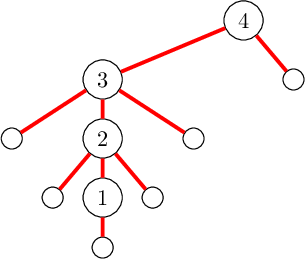

In [3]:
fig9_tree = SDecreasingTree(((0,2,2,1),{(3,2):1, (3,1):1, (2,1): 1}))
viewLatex(fig9_tree)

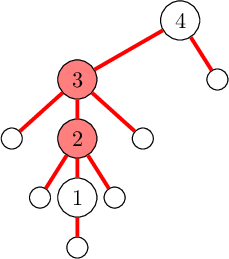

In [6]:
fig9 = SPureIntervalFace(fig9_tree, [(2,3),(3,4)])
viewLatex(fig9)

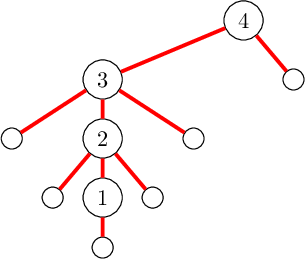

In [7]:
viewLatex(fig9.tree_min())

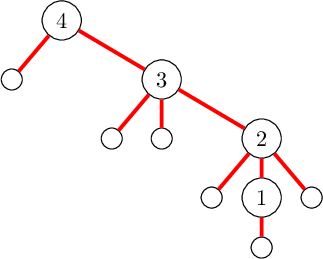

In [8]:
viewLatex(fig9.tree_max())

In [9]:
list(fig9.interval_trees())

[4[3[[], 2[[], 1[[]], []], []], []],
 4[[], 3[[], 2[[], 1[[]], []], []]],
 4[[], 3[[], [], 2[[], 1[[]], []]]],
 4[3[[], [], 2[[], 1[[]], []]], []],
 4[3[[], [], []], 2[[], 1[[]], []]]]

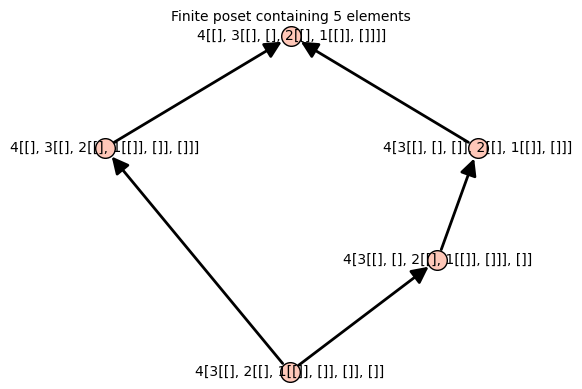

In [10]:
fig9.interval_as_poset()

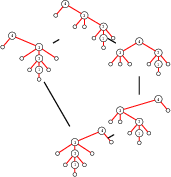

In [11]:
viewLatex(fig9.lattice_printer())

Here is the example of Fig. 10.

In [12]:
fig10_tree = SDecreasingTree(((0,0,2,2,1,2,1,0,2,3),{(10,9):2,(10,7):2,(10,6):2,(10,4):2,(10,2):2,(10,1):2,(10,3):2,(9,6):1,(9,2):1,(7,4):1,(7,1):1,(7,3):1,(6,2):1,(4,3):1}))

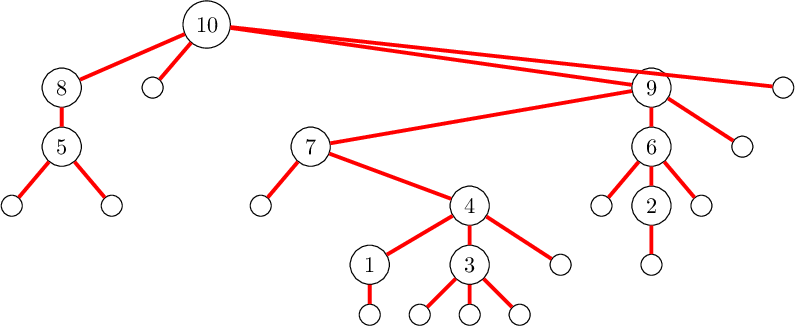

In [13]:
viewLatex(fig10_tree)

In [14]:
fig10 = SPureIntervalFace(fig10_tree, [(1, 4), (2, 6), (4, 9), (5, 10), (6, 9), (8, 10), (9, 10)])

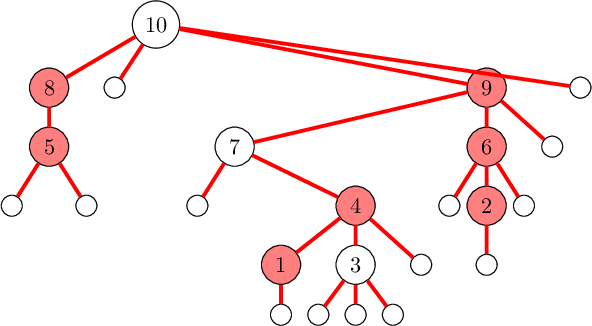

In [15]:
viewLatex(fig10)

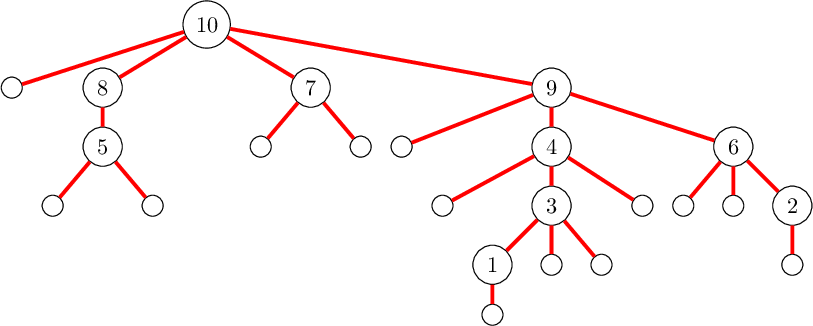

In [16]:
viewLatex(fig10.tree_max())

In [17]:
fig10.interval_as_poset()

Finite poset containing 360 elements (use the .plot() method to plot)

Here is the examples of Fig. 11.

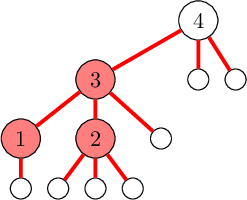

In [18]:
fig11_tree = SDecreasingTree(((0,2,2,2), {(3,2):1}))
fig11 = SPureIntervalFace(fig11_tree, [(1,3),(2,3),(3,4)])
viewLatex(fig11)

You can check Lemma 1.2.2 below

In [19]:
rotated_fig9 = [fig9_tree.rotate_ascent(asc) for asc in fig9.ascents()]

In [20]:
# compute the join
n = fig9.size()
invs = {(b,a):max([t.inversion(b,a) for t in rotated_fig9]) for b in range(1,n+1) for a in range(1,b)}
join = SDecreasingTree((fig9.s(), SDecreasingTrees.transitive_closure_inversions(fig9.s(),invs)))

In [21]:
join == fig9.tree_max()

True

### The combinatorial complex of pure intervals

You can create the $s$-permutahedron as the set of all pure intervals

In [24]:
SPure_0222 = SPureIntervalFaces((0,2,2))
SPure_0222

Pure Interval Faces of (0, 2, 2)

In [25]:
SPure_0222.f_polynomial()

6*t^2 + 20*t + 15

In [43]:
SPureIntervalFaces((0,0,2)).f_polynomial()

4*t^2 + 12*t + 9

In [44]:
SPureIntervalFaces((0,2,2,2)).f_polynomial()

24*t^3 + 130*t^2 + 210*t + 105

The conditions of Proposition 2.9 are implemented at the $s$-decreasing tree level. You can check that both previous examples satisfy the pure-interval conditions.

In [6]:
fig11_tree.is_pure(fig11.tree_max())

True

In [7]:
fig12_tree.is_pure(fig12.tree_max())

True

We can generate all $s$-pure intervals (through $s$-decreasing trees and subsets of tree-ascents) and check that they are the ones satisfying the conditions. 

In [6]:
s = (0,2,2,2)

In [7]:
F = list(SPureIntervalFaces(s))

In [11]:
P = set((t1,t2) for t1,t2 in SDecreasingTrees(s).lattice().relations() if t1.is_pure(t2))

In [12]:
len(F)

469

In [13]:
len(P)

469

In [14]:
set((f.tree_min(),f.tree_max()) for f in F) == P

True

We can also print the complex itself as in Fig. 1 and 2

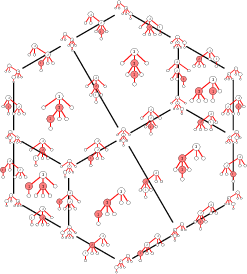

In [45]:
viewLatex(SPureIntervalFaces((0,2,2)).complex_printer())

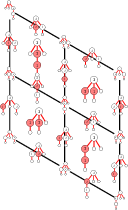

In [46]:
viewLatex(SPureIntervalFaces((0,0,2)).complex_printer())

## Characterization of pure intervals

### Variations and essential variations

Here are some example of variation computation

In [47]:
fig9.variations()

{(4, 3): 0, (4, 2): 0, (3, 2): 1, (4, 1): 0, (3, 1): 1}

In [48]:
fig10.variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 3): 2,
 (9, 3): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (10, 6): 2,
 (9, 6): 1,
 (10, 2): 2,
 (9, 2): 1,
 (6, 2): 1}

In [49]:
fig11.variations()

{(4, 3): 0, (4, 1): 0, (3, 1): 0, (4, 2): 0, (3, 2): 1}

In [50]:
fig9.essential_variations()

{(4, 3): 0, (3, 2): 1}

In [51]:
fig10.essential_variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (9, 6): 1,
 (6, 2): 1}

In [52]:
fig11.essential_variations()

{(4, 3): 0, (4, 1): 0, (3, 1): 0, (3, 2): 1}

### Characterization theorem

Here is an illustration of Theorem 1.3.9 with the example of Fig. 14: an interval that is not a pure interval.

In [54]:
s = (0,0,2,2,2)
t1 = SDecreasingTree((s,{(3,1):1}))
t2 = SDecreasingTree((s,{(5, 4): 1, (5, 3): 1, (5, 1): 1, (3, 1): 2, (4, 1): 1}))

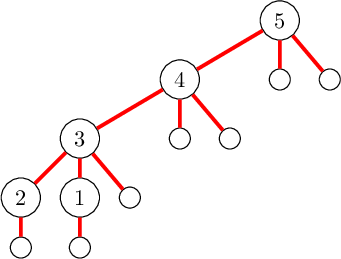

In [55]:
viewLatex(t1)

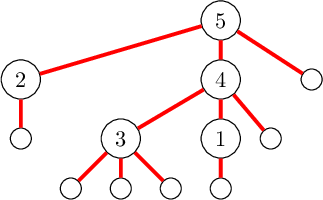

In [56]:
viewLatex(t2)

In [57]:
t1.sweak_lequal(t2)

True

In [58]:
t1.variations(t2)

{(5, 4): 0, (5, 3): 0, (5, 1): 0, (3, 1): 1, (4, 1): 0}

In [59]:
t1.essential_variations(t2)

{(5, 4): 0, (5, 3): 0, (3, 1): 1, (4, 1): 0}

In [60]:
t1.is_plusone(t2)

True

In [61]:
t1.is_pure(t2)

False

### Variation paths

You can compute the variation path of pure intervals variations. Here are the examples of Fig. 9 and 10.

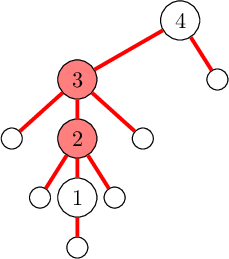

In [62]:
viewLatex(fig9)

In [63]:
for c,a in fig9.variations():
    print("Variation path of ",c,a," : ", fig9.variation_path(c,a))

Variation path of  4 3  :  [4, 3]
Variation path of  4 2  :  [4, 3]
Variation path of  3 2  :  [3, 2]
Variation path of  4 1  :  [4, 3]
Variation path of  3 1  :  [3, 2]


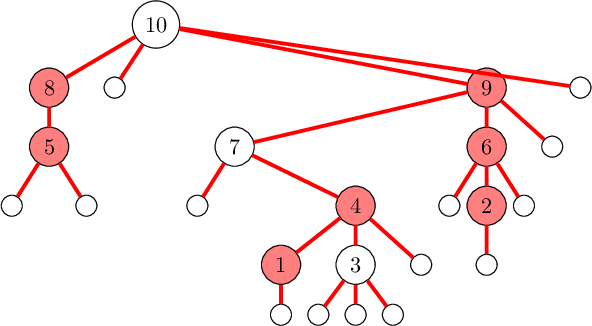

In [64]:
viewLatex(fig10)

In [65]:
for c,a in fig10.variations():
    print("Variation path of ",c,a," : ", fig10.variation_path(c,a))

Variation path of  10 8  :  [10, 8]
Variation path of  10 5  :  [10, 5]
Variation path of  10 9  :  [10, 9]
Variation path of  10 4  :  [10, 9, 4]
Variation path of  9 4  :  [9, 4]
Variation path of  10 3  :  [10, 9, 4]
Variation path of  9 3  :  [9, 4]
Variation path of  10 1  :  [10, 9, 4, 1]
Variation path of  9 1  :  [9, 4, 1]
Variation path of  4 1  :  [4, 1]
Variation path of  10 6  :  [10, 9]
Variation path of  9 6  :  [9, 6]
Variation path of  10 2  :  [10, 9]
Variation path of  9 2  :  [9, 6]
Variation path of  6 2  :  [6, 2]


## Intersection of pure intervals

The intersection of pure intervals can be computed directly.

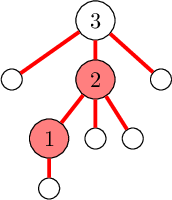

In [66]:
fig15_1_tree = SDecreasingTree(((0,2,2), {(3,2):1,(3,1):1}))
fig15_1 = SPureIntervalFace(fig15_1_tree, [(1,2),(2,3)])
viewLatex(fig15_1)

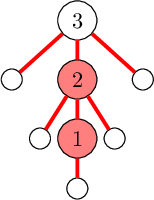

In [67]:
fig15_2_tree = SDecreasingTree(((0,2,2), {(3,2):1,(3,1):1,(2,1):1}))
fig15_2 = SPureIntervalFace(fig15_2_tree, [(1,2),(2,3)])
viewLatex(fig15_2)

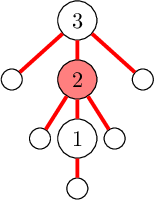

In [68]:
fig15_intersection = fig15_1.intersection(fig15_2)
viewLatex(fig15_intersection)

The minimal tree is the join of the two minimals whereas the maximal tree is the meet of the two maximals.

In [69]:
fig15_intersection.tree_min() == fig15_1.tree_min().sweak_join(fig15_2.tree_min())

True

In [70]:
fig15_intersection.tree_max() == fig15_1.tree_max().sweak_meet(fig15_2.tree_max())

True

You can check that the variations of the intersection are the intersection of the variations.

In [71]:
fig15_1.variations()

{(3, 2): 1, (3, 1): 1, (2, 1): 0}

In [72]:
fig15_2.variations()

{(3, 2): 1, (3, 1): 1, (2, 1): 1}

In [73]:
fig15_intersection.variations()

{(3, 2): 1, (3, 1): 1}

In [74]:
set(fig15_intersection.variations().items()) == set(fig15_1.variations().items()).intersection(fig15_2.variations().items())

True

We show an example where the intersection is empty, i.e. the join of the minimals is not lower than or equal to the meet of the maximum. This can happen even though the intersection of variation is not empty.

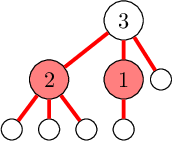

In [75]:
fig15_3_tree = SDecreasingTree(((0,2,2), {(3,1):1}))
fig15_3 = SPureIntervalFace(fig15_3_tree,[(2,3),(1,3)])
viewLatex(fig15_3)

In [76]:
fig15_1.intersection(fig15_3) is None

True

In [77]:
fig15_1.tree_min().sweak_join(fig15_3.tree_min()).sweak_lequal(fig15_1.tree_max().sweak_meet(fig15_3.tree_max()))

False

In [78]:
set(fig15_1.variations().items()).intersection(fig15_3.variations().items())

{((3, 1), 1)}

See also the example of Fig. 16.

In [79]:
fig16_1_tree = SDecreasingTree(((0,0,2,2,1,2,1,0,2,3),{(10,9):2,(10,7):2,(10,6):2,(10,4):2,(10,2):2,(10,1):2,(10,3):2,(9,6):1,(9,2):1,(7,4):1,(7,1):1,(7,3):1,(6,2):1,(4,3):1}))

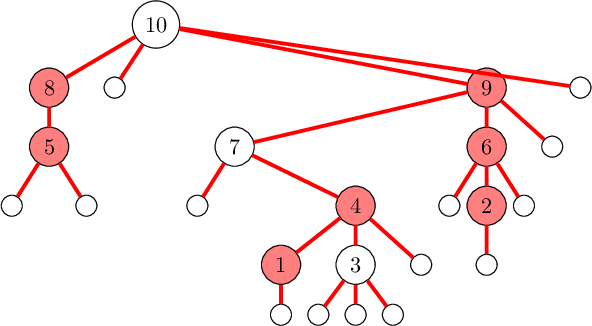

In [80]:
fig16_1 = SPureIntervalFace(fig16_1_tree, [(1, 4), (2, 6), (4, 9), (5, 10), (6, 9), (8, 10), (9, 10)])
viewLatex(fig16_1)

In [81]:
fig16_2_tree = SDecreasingTree(((0,0,2,2,1,2,1,0,2,3),{(10,9):2,(10,8):1,(10,7):1,(10,6):2,(10,4):2,(10,2):2,(10,1):2,(10,3):2,(9,6):2,(9,2):2,(6,2):1,(4,3):1,(4,1):1}))

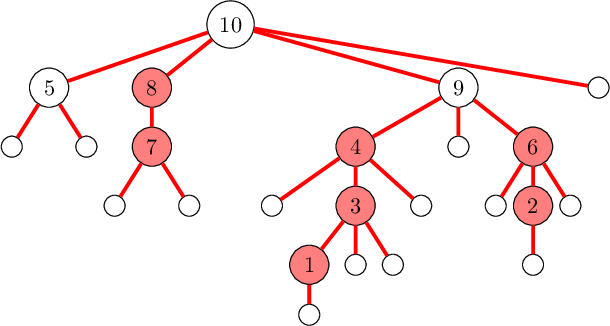

In [82]:
fig16_2 = SPureIntervalFace(fig16_2_tree, [(8,10),(7,10),(1,3),(3,4),(4,9),(2,6),(6,10)])
viewLatex(fig16_2)

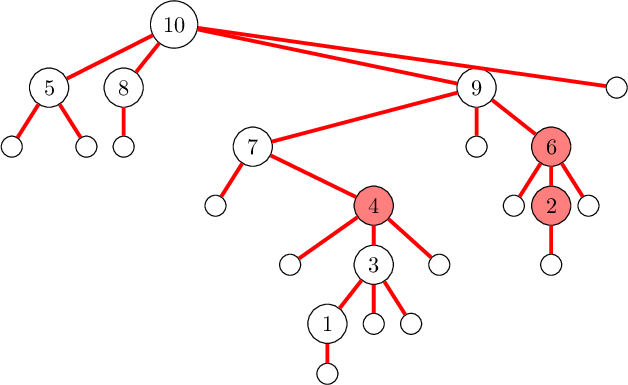

In [83]:
fig16_inter = fig16_1.intersection(fig16_2)
viewLatex(fig16_inter)

In [84]:
fig16_1.variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 3): 2,
 (9, 3): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (10, 6): 2,
 (9, 6): 1,
 (10, 2): 2,
 (9, 2): 1,
 (6, 2): 1}

In [85]:
fig16_2.variations()

{(10, 8): 1,
 (10, 7): 1,
 (9, 4): 0,
 (9, 3): 0,
 (4, 3): 1,
 (9, 1): 0,
 (4, 1): 1,
 (3, 1): 0,
 (10, 6): 2,
 (10, 2): 2,
 (6, 2): 1}

In [86]:
fig16_inter.variations()

{(9, 4): 0, (9, 3): 0, (9, 1): 0, (10, 6): 2, (10, 2): 2, (6, 2): 1}

In [87]:
fig16_inter.essential_variations()

{(9, 4): 0, (10, 6): 2, (6, 2): 1}

In [88]:
fig16_1.essential_variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (9, 6): 1,
 (6, 2): 1}

In [89]:
fig16_2.essential_variations()

{(10, 8): 1,
 (10, 7): 1,
 (9, 4): 0,
 (4, 3): 1,
 (4, 1): 1,
 (3, 1): 0,
 (10, 6): 2,
 (6, 2): 1}

You can compute the compatible variations and check that they are the same as the essential variations of the intersection.

In [90]:
fig16_1.compatible_variations(fig16_2)

{(9, 4): 0, (10, 6): 2, (6, 2): 1}

In [91]:
fig16_inter.essential_variations()

{(9, 4): 0, (10, 6): 2, (6, 2): 1}